In [1]:
import pandas as pd
import numpy as np
import statistics

In [33]:
df_reg = pd.read_excel("datasets/Huang_Zhang_RegressionDataset.xlsx", index_col=0)
df_reg.rename(
    columns={
        "Substance Name": "name",
        "Name type": "name_type",
        "CAS Number": "cas",
        "Smiles": "smiles",
        "Reliability": "reliability",
        "Endpoint": "endpoint",
        "Guideline": "guideline",
        "Principle": "principle",
        "Time (day)": "time_day",
        "Biodegradation (0.1 means 10%)": "biodegradation_percent",
    },
    inplace=True,
)

In [6]:
df_reg = df_reg[["cas", "smiles", "reliability", "endpoint", "guideline", "principle", "time_day", "biodegradation_percent"]]

df_reg = df_reg[df_reg["time_day"] == 28.0]
df_reg = df_reg[df_reg["endpoint"] == "ready"]

df_reg_duplicates = df_reg.groupby(df_reg["cas"].tolist(), as_index=False).size().sort_values(by="size", ascending=False)
df_more_than_replicates = df_reg_duplicates[df_reg_duplicates["size"] > 1]

difference_more_than_40 = []
for cas in df_more_than_replicates["index"]:
    df_curr = df_reg[df_reg["cas"] == cas]
    max_val = df_curr["biodegradation_percent"].max()
    min_val = df_curr["biodegradation_percent"].min()
    diff = max_val - min_val
    if diff > 0.6:
        print(df_curr.head(10))
        difference_more_than_40.append(cas)
print(len(difference_more_than_40))


            cas       smiles  reliability endpoint             guideline  \
Index                                                                      
472    111-67-1  C/C=C\CCCCC            1    ready  OECD Guideline 301 B   
474    111-67-1  C/C=C\CCCCC            2    ready  OECD Guideline 301 D   
478    111-67-1  C/C=C\CCCCC            1    ready  OECD Guideline 301 D   
479    111-67-1  C/C=C\CCCCC            1    ready  OECD Guideline 301 F   
480    111-67-1  C/C=C\CCCCC            2    ready  OECD Guideline 301 F   

                 principle  time_day  biodegradation_percent  
Index                                                         
472          CO2 Evolution      28.0                 0.92000  
474     Closed Bottle Test      28.0                 0.31100  
478     Closed Bottle Test      28.0                 0.72225  
479    Closed Respirometer      28.0                 0.48000  
480    Closed Respirometer      28.0                 0.78950  
            cas          s

In [34]:
df_reg_removed = pd.read_csv("dataframes/improved_data/reg_improved_env_biowin_both_removed_predicted.csv", index_col=0)
df_reg_removed = df_reg_removed[['cas', 'reliability', 'endpoint', 'guideline', 'principle', 'time_day',
       'smiles', 'biodegradation_percent', 'inchi_from_smiles', 'label', 'linear_label', 'non_linear_label',
       'miti_linear_label', 'miti_non_linear_label', 'prediction_class']]
df_class_removed = pd.read_csv("dataframes/improved_data/class_improved_env_biowin_both_removed_predicted.csv", index_col=0)

In [35]:
print(len(df_reg_removed))
df_reg_removed = df_reg_removed[df_reg_removed['prediction_class'] != df_reg_removed['label']]
print(len(df_reg_removed))
print("Falsely labeled as NRB: ", len(df_reg_removed[df_reg_removed["label"] == 0]))
print("Falsely labeled as RB: ", len(df_reg_removed[df_reg_removed["label"] == 1]))
print(df_reg_removed["inchi_from_smiles"].nunique())
df_reg_removed.to_csv("dataframes/removed_from_regression_unvalidated_labels.csv")

print(len(df_class_removed))
df_class_removed = df_class_removed[df_class_removed['prediction_class'] != df_class_removed['label']]
print(len(df_class_removed))
print("Falsely labeled as NRB: ", len(df_class_removed[df_class_removed["label"] == 0]))
print("Falsely labeled as RB: ", len(df_class_removed[df_class_removed["label"] == 1]))
print(df_class_removed["inchi_from_smiles"].nunique())
df_class_removed.to_csv("dataframes/removed_from_classification_unvalidated_labels.csv")

3582
2547
Falsely labeled as NRB:  1654
Falsely labeled as RB:  893
1366
1333
841
Falsely labeled as NRB:  430
Falsely labeled as RB:  411
835


In [19]:
unique_substances = set(df_reg_removed["inchi_from_smiles"].unique())
print(len(unique_substances))
for substance in df_class_removed["inchi_from_smiles"].unique():
  unique_substances.add(substance)
print(len(unique_substances))

1366
1581


In [30]:
df_regression = pd.read_excel("datasets/Huang_Zhang_RegressionDataset.xlsx", index_col=0)
df_regression.rename(
    columns={
        "Substance Name": "name",
        "Name type": "name_type",
        "CAS Number": "cas",
        "Smiles": "smiles",
        "Reliability": "reliability",
        "Endpoint": "endpoint",
        "Guideline": "guideline",
        "Principle": "principle",
        "Time (day)": "time_day",
        "Biodegradation (0.1 means 10%)": "biodegradation_percent",
    },
    inplace=True,
)


In [11]:
dsstox = pd.read_csv("dataframes/DSStox.csv", index_col=0)

In [13]:
dsstox.columns

Index(['cas', 'smiles'], dtype='object')

In [21]:
print(len(df_regression))
cas_not_in_dsstox = df_regression[~df_regression["cas"].isin(dsstox["cas"])]
print(cas_not_in_dsstox["cas"].nunique())

12750
1049


In [22]:
df = pd.read_pickle("reach_study_results_2022/RegisteredSubstances_organic6.pkl")
new_col_names_to_col_names = {
    "CAS_RN": "cas",
    "SMILES corresponding to CAS RN": "smiles",
    "SMILES at pH 7.4": "smiles_ph",
}
df.rename(columns=new_col_names_to_col_names, inplace=True)
df = df[["cas", "smiles", "smiles_ph"]].astype({"smiles": str, "cas": str, "smiles_ph": str})
df = df[df["smiles"] != "nan"]
df_checked = df[~df.smiles.str.contains("*", regex=False)]
df_checked.reset_index(inplace=True, drop=True)

In [23]:
not_checked_by_gluege = cas_not_in_dsstox[~cas_not_in_dsstox["cas"].isin(df_checked["cas"])]
print(not_checked_by_gluege["cas"].nunique())

702


-------------------------------------------------------

In [38]:

df = pd.read_csv("dataframes/improved_data/reg_improved_no_metal_env_smiles.csv", index_col=0)
print(len(df))
df = df[df["time_day"] == 28.0]
print(len(df))
print(df["inchi_from_smiles"].nunique())

10545
5525
4423


In [43]:
counted_duplicates = df.groupby(df["inchi_from_smiles"].tolist(), as_index=False).size().sort_values(by="size", ascending=False)
df_more_than_1_replicates = counted_duplicates[counted_duplicates["size"] > 1]
df_1_replicate = counted_duplicates[counted_duplicates["size"] == 1]
df_more_than_1_replicates

,index,size
1465,InChI=1S/C16H34O/c1-2-3-4-5-6-7-8-9-10-11-12-1...,7
831,InChI=1S/C12H26O/c1-2-3-4-5-6-7-8-9-10-11-12-1...,7
1452,InChI=1S/C16H32/c1-3-5-7-9-11-13-15-16-14-12-1...,6
302,"InChI=1S/C10H20/c1-3-5-7-9-10-8-6-4-2/h3,5H,4,...",6
3287,"InChI=1S/C6H12/c1-3-5-6-4-2/h3H,1,4-6H2,2H3",6
...,...,...
537,InChI=1S/C11H20O2/c1-2-3-4-5-6-7-8-9-10-11(12)...,2
2636,InChI=1S/C36H32Cl4N6O8/c1-17(47)33(35(49)41-27...,2
3981,"InChI=1S/C8H17O5P/c1-4-11-8(9)7-14(10,12-5-2)1...",2
4269,InChI=1S/C9H18N2O/c1-8(2)9(12)10-6-5-7-11(3)4/...,2


In [44]:
print(len(df_more_than_1_replicates))
print(len(df_1_replicate))

823
3600


In [46]:
df_multi = df_more_than_1_replicates#[:100]

all_std = []
std_over = []
for inchi in df_multi['index']:
    df_curr = df[df["inchi_from_smiles"]==inchi]
    std = statistics.stdev(df_curr["biodegradation_percent"])
    if std > 0.3:
        std_over.append(inchi)
    all_std.append(std)
print(sum(all_std)/len(df_multi))
print(len(std_over))
df_over = df[df["inchi_from_smiles"].isin(std_over)]
print(len(df_over))
df_over.head()

0.15354863523595497
147
355


,cas,reliability,endpoint,guideline,principle,time_day,smiles,biodegradation_percent,inchi_from_smiles,pka_acid_1,...,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4
147,101-77-9,1,ready,OECD Guideline 301 B,CO2 Evolution,28.0,NC1=CC=C(CC2=CC=C(N)C=C2)C=C1,0.460000,InChI=1S/C13H14N2/c14-12-5-1-10(2-6-12)9-11-3-...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
148,101-77-9,1,ready,OECD Guideline 301 C,Closed Respirometer,28.0,NC1=CC=C(CC2=CC=C(N)C=C2)C=C1,0.000000,InChI=1S/C13H14N2/c14-12-5-1-10(2-6-12)9-11-3-...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
245,102-81-8,1,ready,OECD Guideline 301 A,DOC Die Away,28.0,CCCC[NH+](CCO)CCCC,0.100000,InChI=1S/C10H23NO/c1-3-5-7-11(9-10-12)8-6-4-2/...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.068002e-23,1.524213e-15,3.828650e-08,9.617135e-01,0.038287
248,102-81-8,1,ready,OECD Guideline 301 B,CO2 Evolution,28.0,CCCC[NH+](CCO)CCCC,0.925000,InChI=1S/C10H23NO/c1-3-5-7-11(9-10-12)8-6-4-2/...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.068002e-23,1.524213e-15,3.828650e-08,9.617135e-01,0.038287
249,102-81-8,1,ready,OECD Guideline 301 C,Closed Respirometer,28.0,CCCC[NH+](CCO)CCCC,0.010000,InChI=1S/C10H23NO/c1-3-5-7-11(9-10-12)8-6-4-2/...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.068002e-23,1.524213e-15,3.828650e-08,9.617135e-01,0.038287
254,102-81-8,2,inherent,OECD Guideline 302 B,DOC Die Away,28.0,CCCC[NH+](CCO)CCCC,0.910000,InChI=1S/C10H23NO/c1-3-5-7-11(9-10-12)8-6-4-2/...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.068002e-23,1.524213e-15,3.828650e-08,9.617135e-01,0.038287
255,102-81-8,2,ready,OECD Guideline 301 C,Closed Respirometer,28.0,CCCC[NH+](CCO)CCCC,0.013333,InChI=1S/C10H23NO/c1-3-5-7-11(9-10-12)8-6-4-2/...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.068002e-23,1.524213e-15,3.828650e-08,9.617135e-01,0.038287
264,102-82-9,1,ready,OECD Guideline 301 B,CO2 Evolution,28.0,CCCC[NH+](CCCC)CCCC,0.880000,InChI=1S/C12H27N/c1-4-7-10-13(11-8-5-2)12-9-6-...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.289683e-23,1.579897e-15,3.968522e-08,9.968477e-01,0.003152
266,102-82-9,1,ready,OECD Guideline 301 C,Closed Respirometer,28.0,CCCC[NH+](CCCC)CCCC,0.020000,InChI=1S/C12H27N/c1-4-7-10-13(11-8-5-2)12-9-6-...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,6.289683e-23,1.579897e-15,3.968522e-08,9.968477e-01,0.003152
317,103-41-3,1,ready,OECD Guideline 301 F,Closed Respirometer,28.0,O=C(OCC1=CC=CC=C1)\C=C\C1=CC=CC=C1,0.940000,InChI=1S/C16H14O2/c17-16(12-11-14-7-3-1-4-8-14...,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000


-------------------------------------------------------------

# UMAP dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
import statistics

import umap.umap_ as umap
import umap.plot
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint
import matplotlib.pyplot as plt

/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
df = pd.read_csv("dataframes/improved_data/class_improved_env.csv", index_col=0)

df_in = pd.read_csv("dataframes/improved_data/class_improved_env_biowin_both_readded.csv", index_col=0)
df_in = df_in[['cas', 'smiles','inchi_from_smiles', 'label', 'linear_label',
       'non_linear_label', 'miti_linear_label', 'miti_non_linear_label',
       'prediction_class']]
df_in.reset_index(inplace=True, drop=True)
df_removed = pd.read_csv("dataframes/improved_data/class_improved_env_biowin_both_removed_predicted.csv", index_col=0)
df_removed = df_removed[df_removed["label"] != df_removed["prediction_class"]]
df_removed.reset_index(inplace=True, drop=True)

In [3]:
def convert_to_maccs_fingerprints(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    mols = [AllChem.MolFromSmiles(smiles) for smiles in df["smiles"]]
    fp_vecs = [GetMACCSKeysFingerprint(mol) for mol in mols]
    fp_arrays = [np.frombuffer(fp_vec.ToBitString().encode(), 'u1') - ord('0') for fp_vec in fp_vecs]
    df["fingerprint"] = [fp_array.tolist() for fp_array in fp_arrays]
    return df

df_in = convert_to_maccs_fingerprints(df=df_in)
df_removed = convert_to_maccs_fingerprints(df=df_removed)

In [21]:
# set for all
n_components = 2
n_neighbors = 15
min_dist = 0.7
metric = "manhattan"
random_state = 42


## See if can seperate data from removed_data

/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

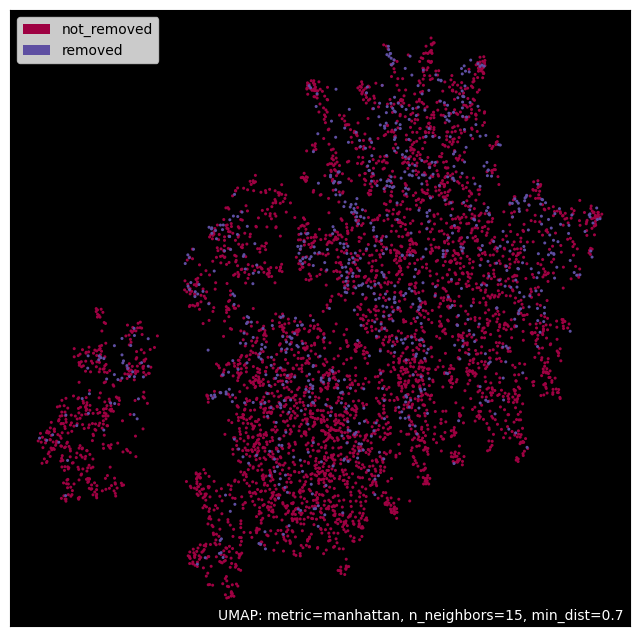

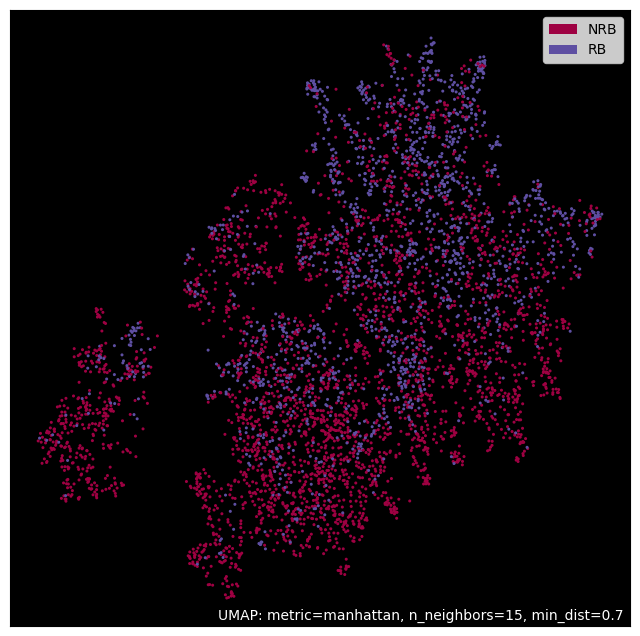

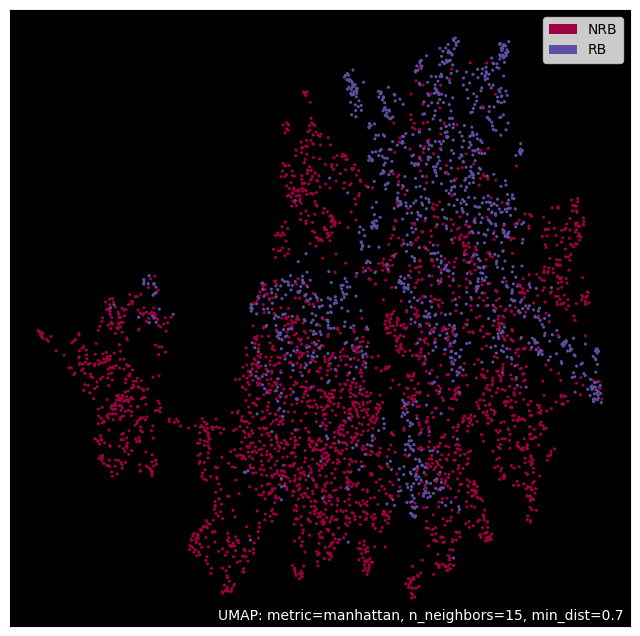

In [22]:
# Don't give UMAP labels, show removed and not removed for Curated_SCS
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = "not_removed" # data
df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = "removed" # removed
df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)

X, y = df_both.drop("label", axis=1), df_both[["label"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y, theme="viridis") 


# Not giving UMAP labels but showing NRB and RB for Curated_SCS
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label"] = df_in_expand['label'].map({0: "NRB", 1: "RB"})
df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = df_removed["label"]
df_removed_expand["label"] = df_removed_expand['label'].map({0: "NRB", 1: "RB"})
df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)

X, y = df_both.drop("label", axis=1), df_both[["label"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y, theme="viridis") 


# Not giving UMAP labels but showing NRB and RB for Curated_final
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label"] = df_in_expand['label'].map({0: "NRB", 1: "RB"})

X, y = df_in_expand.drop("label", axis=1), df_in_expand[["label"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y, theme="viridis") 

## See if seperates not removed data based on label

/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

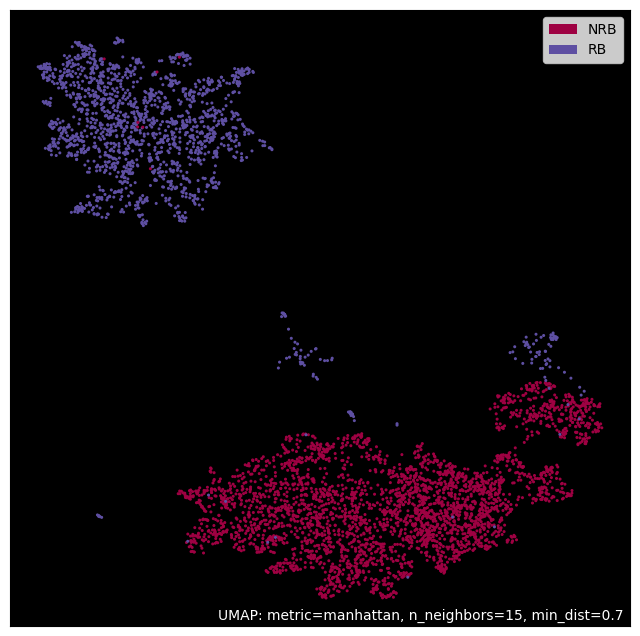

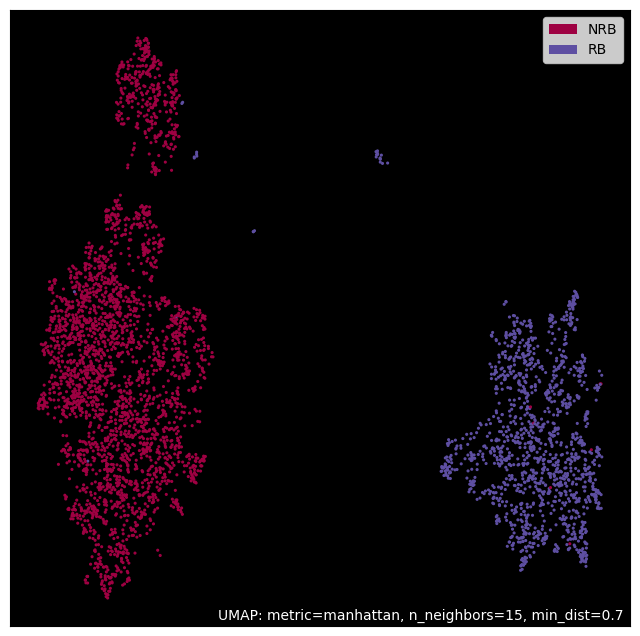

In [23]:
# Curated_SCS
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label"] = df_in_expand['label'].map({0: "NRB", 1: "RB"})
df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = df_removed["label"]
df_removed_expand["label"] = df_removed_expand['label'].map({0: "NRB", 1: "RB"})
df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)

X, y = df_both.drop("label", axis=1), df_both[["label"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X, y_encoded)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y, theme="viridis") 

# Curated_final
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label"] = df_in_expand['label'].map({0: "NRB", 1: "RB"})

X, y = df_in_expand.drop("label", axis=1), df_in_expand[["label"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X, y_encoded)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y, theme="viridis") 

## See what the removed data points are more associated with 

/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/master_thesis_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/paulina_koerner/Desktop/MasterThesis/ma

<Axes: >

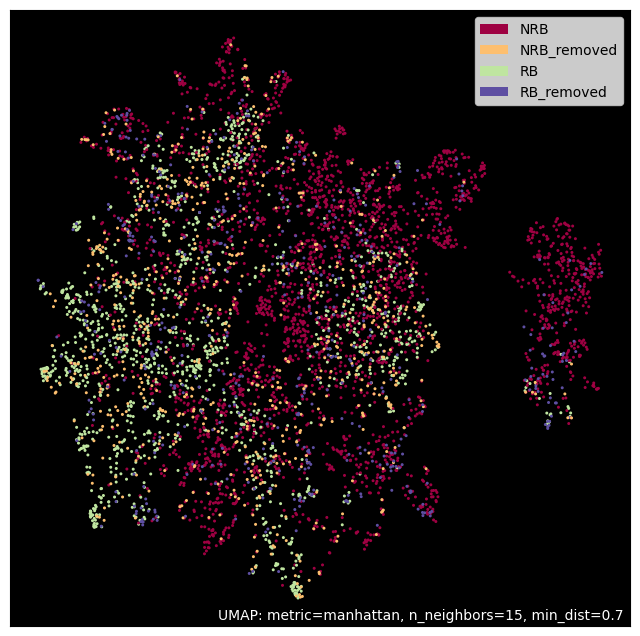

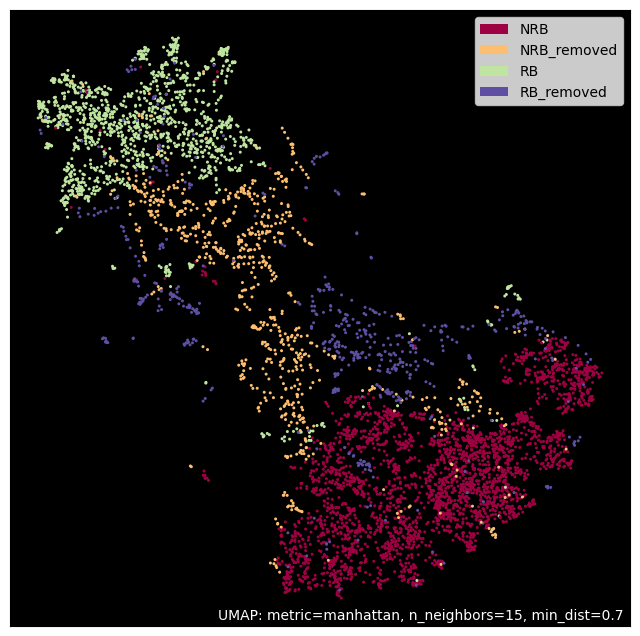

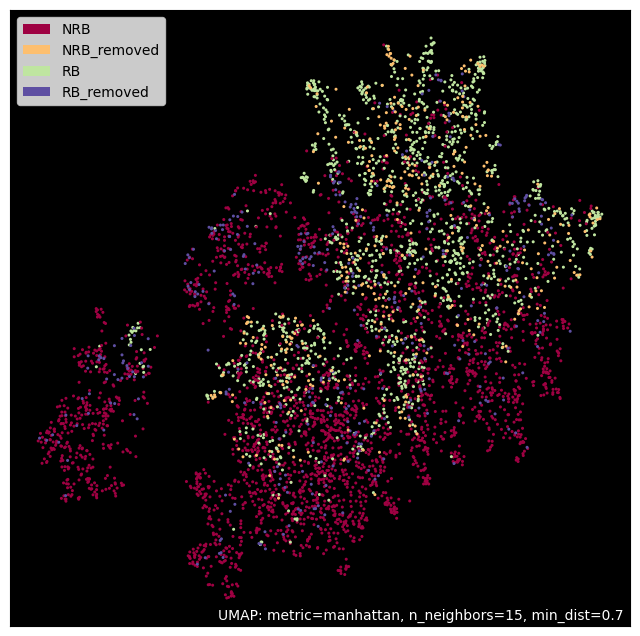

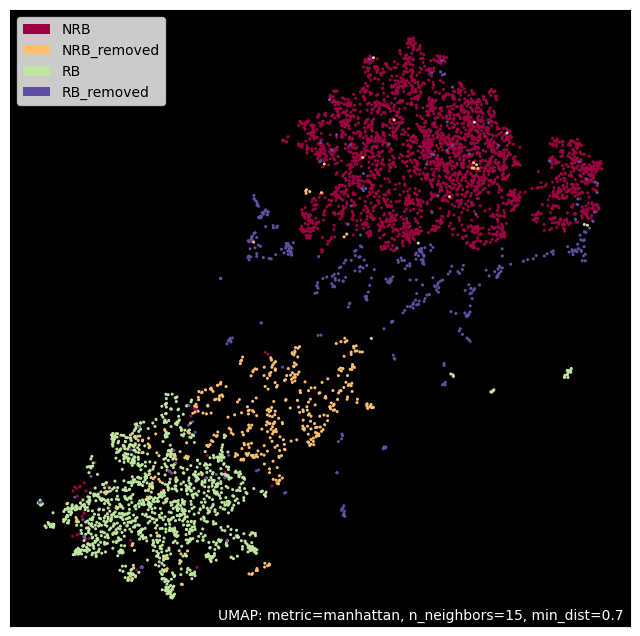

In [24]:
#### Curated_SCS
df_in2 = pd.read_csv("dataframes/improved_data/class_improved_env_biowin_both.csv", index_col=0)
df_in2 = df_in2[['cas', 'smiles','inchi_from_smiles', 'label', 'linear_label',
       'non_linear_label', 'miti_linear_label', 'miti_non_linear_label']]
df_in2.reset_index(inplace=True, drop=True)
df_removed2 = pd.read_csv("dataframes/improved_data/class_improved_env_biowin_both_removed_predicted.csv", index_col=0)
df_removed2.reset_index(inplace=True, drop=True)

df_in2 = convert_to_maccs_fingerprints(df=df_in2)
df_removed2 = convert_to_maccs_fingerprints(df=df_removed2)

cols = [*range(0, 167, 1)]
df_in2_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in2_expand["label"] = df_in["label"]
df_removed2_expand = pd.DataFrame(df_removed2.fingerprint.tolist(), columns=cols)
df_removed2_expand["label"] = df_removed2['label'] + 2
df_both2 = pd.concat([df_in2_expand, df_removed2_expand], axis=0)
df_both2["label_str"] = df_both2['label'].map({0: "NRB", 1: "RB", 2: "NRB_removed", 3: "RB_removed"})

# Without giving UMAP labels
X, y, y_str = df_both2.drop(["label", "label_str"], axis=1), df_both2[["label"]].values.flatten(), df_both2[["label_str"]].values.flatten()
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y_str, theme="viridis") 

# With giving UMAP labels
X, y, y_str = df_both2.drop(["label", "label_str"], axis=1), df_both2[["label"]].values.flatten(), df_both2[["label_str"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X, y_encoded)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y_str, theme="viridis") 

#### Curated_final
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = df_removed['label'] + 2
df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)
df_both["label_str"] = df_both['label'].map({0: "NRB", 1: "RB", 2: "NRB_removed", 3: "RB_removed"})

# Without giving UMAP labels
X, y, y_str = df_both.drop(["label", "label_str"], axis=1), df_both[["label"]].values.flatten(), df_both[["label_str"]].values.flatten()
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y_str, theme="viridis") 

# With giving UMAP labels
X, y, y_str = df_both.drop(["label", "label_str"], axis=1), df_both[["label"]].values.flatten(), df_both[["label_str"]].values.flatten()
y_encoded = pd.factorize(y)[0]
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state).fit(X, y_encoded)
X_reduced = manifold.transform(X)
umap.plot.points(manifold, labels=y_str, theme="viridis") 



<Axes: >

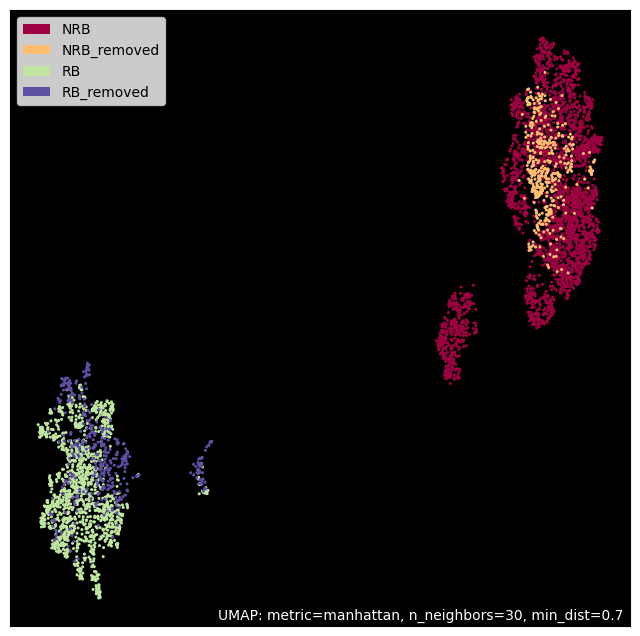

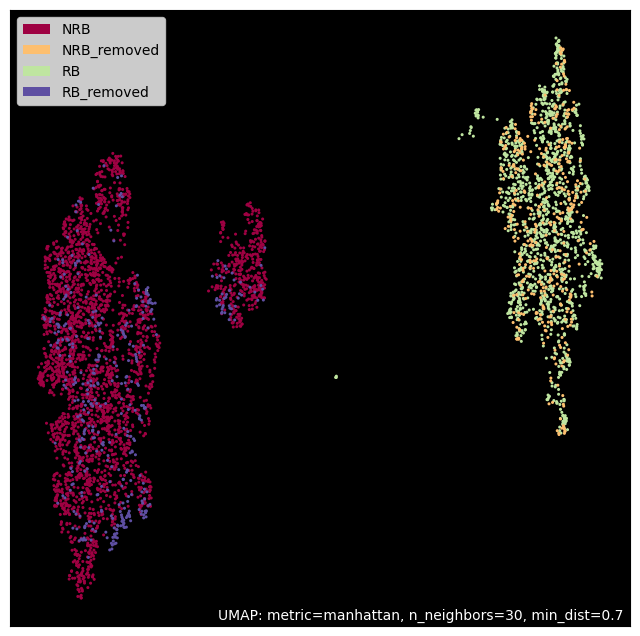

In [20]:
# See where removed data points are when just plotting NRB and RB as experimental studies show
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label_legend"] = df_in["label"]

df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = df_removed['label'] 
df_removed_expand["label_legend"] = df_removed['label'] + 2

df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)
df_both["label_str"] = df_both['label_legend'].map({0: "NRB", 1: "RB", 2: "NRB_removed", 3: "RB_removed"})


X, y, y_str = df_both.drop(["label", "label_str"], axis=1), df_both[["label"]].values.flatten(), df_both[["label_str"]].values.flatten()
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric).fit(X, y)
X_reduced = manifold.transform(X)

umap.plot.points(manifold, labels=y_str, theme="viridis") 


# Reverse label of removed data
cols = [*range(0, 167, 1)]
df_in_expand = pd.DataFrame(df_in.fingerprint.tolist(), columns=cols)
df_in_expand["label"] = df_in["label"]
df_in_expand["label_legend"] = df_in["label"]

df_removed_expand = pd.DataFrame(df_removed.fingerprint.tolist(), columns=cols)
df_removed_expand["label"] = df_removed['label'] 
df_removed_expand["label_legend"] = df_removed['label'] + 2

df_both = pd.concat([df_in_expand, df_removed_expand], axis=0)
df_both["label"] = df_both['label_legend'].map({0: 0, 1: 1, 2: 1, 3: 0})
df_both["label_str"] = df_both['label_legend'].map({0: "NRB", 1: "RB", 2: "NRB_removed", 3: "RB_removed"})


X, y, y_str = df_both.drop(["label", "label_str"], axis=1), df_both[["label"]].values.flatten(), df_both[["label_str"]].values.flatten()
manifold = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric).fit(X, y)
X_reduced = manifold.transform(X)

umap.plot.points(manifold, labels=y_str, theme="viridis") 

<Axes: >

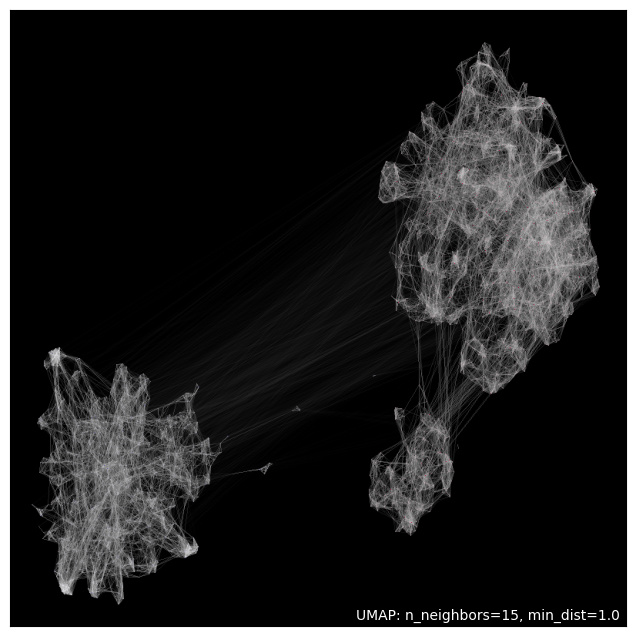

In [13]:
umap.plot.connectivity(manifold, labels=y, show_points=True, theme="viridis")